In [1]:
import tensorflow as tf
import numpy as np
import sys
sys.path.append("..") # Adds higher directory to python modules path.
import branchingdnn as branching
from branchingdnn.utils import * 

In [2]:
# x = tf.keras.models.load_model('../models/alexNetv6_compress.hdf5', custom_objects={'confidenceScore': confidenceScore,
#                                                                          'unconfidence': unconfidence,
#                                                                          'confidenceDifference': confidenceDifference,
#                                                                          'BranchEndpoint': branching.branches.branch.BranchEndpoint,
#                                                                          'FeatureDistillation': branching.branches.branch.FeatureDistillation})

In [3]:
# x.compile(optimizer=tf.optimizers.SGD(lr=0.001), loss='SparseCategoricalCrossentropy', metrics=['accuracy',confidenceDifference],run_eagerly=True)
# train_ds, test_ds, validation_ds = normal_dataset
# x.evaluate(test_ds, verbose=2)

In [4]:
# x = tf.keras.models.load_model('../models/alexNetv6_feat_distill_4.hdf5', custom_objects={'confidenceScore': confidenceScore,
#                                                                          'unconfidence': unconfidence,
#                                                                          'confidenceDifference': confidenceDifference,
#                                                                          'BranchEndpoint': branching.branches.branch.BranchEndpoint,
#                                                                          'FeatureDistillation': branching.branches.branch.FeatureDistillation,
#                                                                          'FeatureDistillation_clear': branching.branches.branch.FeatureDistillation_clear})

In [5]:
# x.summary()   

In [6]:
# if not dataset:
# dataset = branching.dataset.prepare.dataset_distil(tf.keras.datasets.cifar10.load_data(),32,5000,22500,(227,227))

In [7]:
# x.compile(optimizer=tf.optimizers.SGD(lr=0.001), loss='SparseCategoricalCrossentropy', metrics=['accuracy',confidenceDifference],run_eagerly=True)

In [8]:
# train_ds, test_ds, validation_ds = dataset
# x.evaluate(test_ds, verbose=2)

baseline: 
312/312 - 19s - loss: 3.6760 - dense_2_loss: 0.6242 - branch_softmax_loss: 1.3435 - branch_softmax_1_loss: 1.0038 - branch_softmax_2_loss: 0.7045 - dense_2_accuracy: 0.7948 - dense_2_confidenceDifference: 0.0955 - branch_softmax_accuracy: 0.6202 - branch_softmax_confidenceDifference: 0.0610 - branch_softmax_1_accuracy: 0.7387 - branch_softmax_1_confidenceDifference: 0.0632 - branch_softmax_2_accuracy: 0.8073 - branch_softmax_2_confidenceDifference: 0.0773

feature_distil 1 results:

312/312 - 19s - loss: 106350.4688 - dense_2_loss: 0.6242 - branch_softmax_loss: 1.0999 - dense_2_accuracy: 0.7948 - dense_2_confidenceDifference: 0.0955 - branch_softmax_accuracy: 0.6580 - branch_softmax_confidenceDifference: 0.0683 - branch_teaching_distill: 106347.7500 - branch_softmax_KL: 0.9727

number 2 results:
312/312 - 19s - loss: 106322.7031 - dense_2_loss: 0.6242 - branch_softmax_loss: 1.2637 - dense_2_accuracy: 0.7948 - dense_2_confidenceDifference: 0.0955 - branch_softmax_accuracy: 0.6382 - branch_softmax_confidenceDifference: 0.0631 - branch_teaching_distill: 106319.7344 - branch_softmax_KL: 1.0670


number 3 results:
312/312 - 29s - loss: 166223.5781 - dense_2_loss: 0.6242 - branch_softmax_loss: 1.1222 - branch_softmax_1_loss: 0.8409 - branch_softmax_2_loss: 0.6892 - dense_2_accuracy: 0.7948 - dense_2_confidenceDifference: 0.0955 - branch_softmax_accuracy: 0.6825 - branch_softmax_confidenceDifference: 0.0667 - branch_softmax_1_accuracy: 0.7635 - branch_softmax_1_confidenceDifference: 0.0700 - branch_softmax_2_accuracy: 0.8064 - branch_softmax_2_confidenceDifference: 0.0775 - branch_teaching_distill: 104909.4453 - branch_teaching_1_distill: 61309.5430 - branch_softmax_KL: 0.8163 - branch_softmax_1_KL: 0.3491 - branch_softmax_2_KL: 0.0748

bottleneck only:
312/312 - 28s - loss: 4.8280 - dense_2_loss: 0.6242 - branch_softmax_loss: 1.0523 - branch_softmax_1_loss: 0.9956 - branch_softmax_2_loss: 0.6793 - dense_2_accuracy: 0.7948 - dense_2_confidenceDifference: 0.0955 - branch_softmax_accuracy: 0.6842 - branch_softmax_confidenceDifference: 0.0681 - branch_softmax_1_accuracy: 0.7487 - branch_softmax_1_confidenceDifference: 0.0630 - branch_softmax_2_accuracy: 0.8060 - branch_softmax_2_confidenceDifference: 0.0803 - branch_softmax_KL: 0.9346 - branch_softmax_1_KL: 0.4687 - branch_softmax_2_KL: 0.0733

In [9]:
num = 0.6825 - 0.6202 
num

0.06230000000000002

In [10]:
# branches = 1
# teaching_features = [1,2,3,4]
# if type(teaching_features) is not list:
#     teaching_features = [teaching_features]
# print(teaching_features)
# print(min(branches, len(teaching_features)))
# y = teaching_features[min(branches, len(teaching_features))]
# y

In [11]:
# Download MNIST dataset
# mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
# print(y_train)
K= 10 # number of classes

train_labels = tf.keras.utils.to_categorical(train_labels,10)
test_labels = tf.keras.utils.to_categorical(test_labels,10)

validation_size = 5000
shuffle_size = 22500
batch_size=32
validation_images, validation_labels = train_images[:validation_size], train_labels[:validation_size] #get the first 5k training samples as validation set
train_images, train_labels = train_images[validation_size:], train_labels[validation_size:] # now remove the validation set from the training set.
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
validation_ds = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels))


def augment_images(image, label,input_size=(227,227), channel_first = False):
            # Normalize images to have a mean of 0 and standard deviation of 1
            # image = tf.image.per_image_standardization(image)
            # Resize images from 32x32 to 277x277
            image = tf.image.resize(image,input_size)
            if channel_first:
                image = tf.transpose(image, [2, 0, 1])
            
            return image, label

train_ds_size = len(list(train_ds))
test_ds_size = len(list(test_ds))
validation_ds_size = len(list(validation_ds))
train_ds = (train_ds.map(augment_images))
validation_ds = (validation_ds.map(augment_images))
test_ds = (test_ds.map(augment_images))


train_ds = (train_ds.map(augment_images))
validation_ds = (validation_ds.map(augment_images))
test_ds = (test_ds.map(augment_images))

target = tf.data.Dataset.from_tensor_slices((train_labels))
train_ds = tf.data.Dataset.zip((train_ds,target))

v_target = tf.data.Dataset.from_tensor_slices((validation_labels))
validation_ds = tf.data.Dataset.zip((validation_ds,v_target))

t_target = tf.data.Dataset.from_tensor_slices((test_labels))
test_ds = tf.data.Dataset.zip((test_ds,t_target))


print("trainSize {}".format(train_ds_size))
print("testSize {}".format(test_ds_size))
train_ds = (train_ds
                
                .shuffle(buffer_size=tf.cast(shuffle_size,'int64'))
                .batch(batch_size=batch_size, drop_remainder=True))

test_ds = (test_ds
               
                #   .shuffle(buffer_size=train_ds_size)
                .batch(batch_size=1, drop_remainder=True))

validation_ds = (validation_ds
               
                #   .shuffle(buffer_size=validation_ds_size)
                .batch(batch_size=batch_size, drop_remainder=True))



trainSize 45000
testSize 10000


In [23]:
# This function to generate evidence is used for the first example
def relu_evidence(logits):
    return tf.nn.relu(logits)

# This one usually works better and used for the second and third examples
# For general settings and different datasets, you may try this one first
def exp_evidence(logits): 
    return tf.exp(tf.clip_by_value(logits,-10,10))

# This one is another alternative and 
# usually behaves better than the relu_evidence 
def softplus_evidence(logits):
    return tf.nn.softplus(logits)
    
def KL(alpha):
    # print("K:",K)
    beta=tf.constant(np.ones((1,K)),dtype=tf.float32)
    S_alpha = tf.reduce_sum(alpha,axis=1,keepdims=True)
    S_beta = tf.reduce_sum(beta,axis=1,keepdims=True)
    lnB = tf.compat.v1.lgamma(S_alpha) - tf.reduce_sum(tf.compat.v1.lgamma(alpha),axis=1,keepdims=True)
    lnB_uni = tf.reduce_sum(tf.compat.v1.lgamma(beta),axis=1,keepdims=True) - tf.compat.v1.lgamma(S_beta)
    
    dg0 = tf.compat.v1.digamma(S_alpha)
    dg1 = tf.compat.v1.digamma(alpha)
    
    kl = tf.reduce_sum((alpha - beta)*(dg1-dg0),axis=1,keepdims=True) + lnB + lnB_uni
    # print("kl", kl)
    return kl
def mse_loss(labels, alpha): 
        S = tf.reduce_sum(alpha, axis=1, keepdims=True) 
        E = alpha - 1
        m = alpha / S

        A = tf.reduce_sum((labels-m)**2, axis=1, keepdims=True) 
        B = tf.reduce_sum(alpha*(S-alpha)/(S*S*(S+1)), axis=1, keepdims=True) 

#         annealing_coef = tf.minimum(1.0,tf.cast(global_step/annealing_step,tf.float32))
        annealing_coef = 1
        alp = E*(1-labels) + 1 
        # print("alp", alp)
#         C =  annealing_coef * KL(alp)
#         print(alpha)
        C = keras_kl(labels, alpha)
        return (A + B) + C
    
    
def loss_function(annealing_rate=1, momentum=1, decay=1, global_loss=False):
    #create a wrapper function that returns a function
    temperature = 1
    Classes = 10
    keras_kl = tf.keras.losses.KLDivergence()
    
    annealing_rate = annealing_rate
    momentum_rate = momentum
    decay_rate = decay
    
    
    def mse_loss(labels, outputs): 
        evidence = softplus_evidence(outputs)
        alpha = evidence + 1
        S = tf.reduce_sum(alpha, axis=1, keepdims=True) 
        E = alpha - 1
        m = alpha / S
#         print("m",m)
#         print("global", labels)
        A = tf.reduce_sum((labels-m)**2, axis=1, keepdims=True) 
        B = tf.reduce_sum(alpha*(S-alpha)/(S*S*(S+1)), axis=1, keepdims=True) 

        annealing_coef = tf.minimum(1.0,tf.cast(annealing_rate,tf.float32))
#         annealing_coef = 1
        alp = E*(1-labels) + 1 
        # print("alp", alp)
        C =  annealing_coef * KL(alp)
#         print(alpha)
#         C = keras_kl(labels, alpha)
        return (A + B) + C
    
    def mse_loss_global(labels, outputs): 
#         labels = tf.one_hot(tf.cast(labels, tf.int32), 10)
# #         print("onehot",labels)
#         labels = tf.cast(labels, dtype=tf.float32)
#         try:
#             labels= tf.squeeze(labels,[1])
#         except:
#                 print("loss labels can't be squeezed")
        print("global Loss")
        evidence = softplus_evidence(outputs)
        alpha = evidence + 1
        S = tf.reduce_sum(alpha, axis=1, keepdims=True) 
        E = alpha - 1
        m = alpha / S
#         print("m",m)
#         print("global", labels)
        A = tf.reduce_sum((labels-m)**2, axis=1, keepdims=True) 
        B = tf.reduce_sum(alpha*(S-alpha)/(S*S*(S+1)), axis=1, keepdims=True) 

        annealing_coef = tf.minimum(1.0,tf.cast(annealing_rate,tf.float32))
#         annealing_coef = 1
        alp = E*(1-labels) + 1 
        # print("alp", alp)
        C =  annealing_coef * KL(alp)
#         print(alpha)
#         C = keras_kl(labels, alpha)
        return (A + B) + C

    if global_loss == True:
        return  mse_loss_global
    else:
        return  mse_loss

class EvidenceEndpoint(keras.layers.Layer):
        def __init__(self, num_outputs, name=None, **kwargs):
            super(EvidenceEndpoint, self).__init__(name=name)
            self.num_outputs = num_outputs
#             self.kl = tf.keras.losses.KLDivergence()
            self.loss_fn = loss_function()
            self.cross_entropy = tf.keras.losses.categorical_crossentropy
            self.evidence = softplus_evidence
#             self.evidence = tf.compat.v1.distributions.Dirichlet
            self.temperature = 10
            self.lmb = 0.005
            self.counter = 1406
            self.count = 0
        def build(self, input_shape):
            self.kernel = self.add_weight("kernel", shape=[int(input_shape[-1]), self.num_outputs])
        
        def get_config(self):
            config = super().get_config().copy()
            config.update({
                'num_outputs': self.num_outputs,
                'name': self.name
            })
            return config

        def call(self, inputs, labels,learning_rate=1):
#             
            self.count = self.count + 1    
            outputs = tf.matmul(inputs,self.kernel)
            # tf.print("outputs ",outputs, summarize=-1)
            softmax = tf.nn.softmax(outputs)
#             print(softmax)
            
            evidence = self.evidence(outputs)
            alpha = evidence + 1

            loss = tf.reduce_mean(self.loss_fn(labels, outputs))
            if self.count == self.counter:
                print("warmup finished")
            if self.count <= self.counter:
                loss = tf.reduce_mean(self.cross_entropy(labels,outputs))
            
            # labels = tf.cast(tf.one_hot(tf.cast(labels, tf.int32), 10), dtype=labels.dtype)
            # try:
            #     labels= tf.squeeze(labels,[1])
            # except:
            #     print("labels can't be squeezed")
#             print("after labels",labels)
            u = self.num_outputs / tf.reduce_sum(alpha, axis=1, keepdims=True) #uncertainty
            prob = alpha/tf.reduce_sum(alpha, 1, keepdims=True) 
            l2_loss = tf.nn.l2_loss(self.weights) * self.lmb
            total_loss = loss + l2_loss
            self.add_loss(total_loss)
            pred = tf.argmax(outputs,1)
# #             print("pred", pred)
#             results = tf.one_hot(pred,self.num_outputs)
            truth = tf.argmax(labels,1)
# #             print("truth", truth)
            match = tf.reshape(tf.cast(tf.equal(pred, truth), tf.float32),(-1,1))
# #             print("match", match)
            total_evidence = tf.reduce_sum(evidence,1, keepdims=True)
            mean_avg = tf.reduce_mean(total_evidence)
            mean_succ = tf.reduce_sum(tf.reduce_sum(evidence,1, keepdims=True)*match) / tf.reduce_sum(match+1e-20)
            mean_fail = tf.reduce_sum(tf.reduce_sum(tf.reduce_sum(evidence,1, keepdims=True)*(1-match)) / (tf.reduce_sum(tf.abs(1-match))+1e-20) )

            
            self.add_metric(evidence, name=self.name+"_evidence")
            self.add_metric(outputs, name=self.name+"_inputs")
            self.add_metric(mean_avg, name=self.name+"_mean_ev_avg")
            self.add_metric(mean_succ, name=self.name+"_mean_ev_succ")
            self.add_metric(mean_fail, name=self.name+"_mean_ev_fail")
            
            
#             total_loss =tf.reduce_mean(normal_loss) + l2_loss
            # print(total_loss)
#             total_evidence = tf.reduce_sum(evidence,1, keepdims=True) 
            # print(total_evidence)
#             pred = tf.argmax(outputs, 1)
#             truth = tf.argmax(labels, 1)
#             match = tf.reshape(tf.cast(tf.equal(pred, truth), tf.float32),(-1,1))
#             # print("match",match)
#             
#             # print("mean_Avg")


            # print('metrics')
#             self.add_loss(total_loss)
            # print("pred",inputs)
            # print("loss")
     
            
            return softmax
    



In [24]:
outputs =[]
targets = keras.Input(shape=(10,),name='targets')
inputs = keras.Input(shape=(227,227,3))
x = keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3))(inputs)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2))(x)
x = keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2))(x)
x = keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2))(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(4096, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)

# ### first branch
# branchLayer = keras.layers.Flatten(name=tf.compat.v1.get_default_graph().unique_name("branch_flatten"))(x)
# branchLayer = keras.layers.Dense(124, activation="relu",name=tf.compat.v1.get_default_graph().unique_name("branch124"))(branchLayer)
# branchLayer = keras.layers.Dense(64, activation="relu",name=tf.compat.v1.get_default_graph().unique_name("branch64"))(branchLayer)
# branchLayer = keras.layers.Dense(10, name=tf.compat.v1.get_default_graph().unique_name("branch_output"))(branchLayer)

x = keras.layers.Dense(4096, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
# x = keras.layers.Dense(10, activation='softmax')(x)
# ### second Branch
# branchLayer2 = keras.layers.Flatten(name=tf.compat.v1.get_default_graph().unique_name("branch_flatten"))(x)
# branchLayer2 = keras.layers.Dense(10, name=tf.compat.v1.get_default_graph().unique_name("branch_output"))(branchLayer2)

# x = 
x = EvidenceEndpoint(10)(x,targets)

# model = keras.Model(inputs=inputs, outputs=[x,branchLayer,branchLayer2], name="alexnet")
model = keras.Model(inputs=[inputs,targets], outputs=[x], name="alexnet")
loss_fn = loss_function(1,global_loss=True)
model.compile( loss="categorical_crossentropy", optimizer=tf.optimizers.SGD(lr=0.001,momentum=0.9), metrics=['accuracy'])
model.summary()


Model: "alexnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 227, 227, 3) 0                                            
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 55, 55, 96)   34944       input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_10 (BatchNo (None, 55, 55, 96)   384         conv2d_10[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_6 (MaxPooling2D)  (None, 27, 27, 96)   0           batch_normalization_10[0][0]     
____________________________________________________________________________________________

In [25]:
# model._layers.pop(-1)
# # model.summary()
# print(model._layers[-1])
# inputs = model.inputs
# # targets = keras.Input(shape=(10,),name='targets')
# # inputs.append(targets)
# inputs

In [26]:
# inputs.pop()
# print(inputs)
# model_output = model.layers[-1].output
# print(model_output)

# output = EvidenceEndpoint(10, activation='relu')(model_output,targets)

# model = keras.Model(inputs=inputs, outputs=output, name="alex_crossE")
# model.compile(loss="categorical_crossentropy", optimizer=tf.optimizers.SGD(lr=0.001,momentum=0.9), metrics=['accuracy'])
# model.summary()


In [27]:
root_logdir = os.path.join(os.curdir, "logs\\fit\\")
checkpoint = keras.callbacks.ModelCheckpoint("alexNetv6_evidence_4.hdf5", monitor='val_loss',verbose=1,save_best_only=True, mode='auto',period=1)
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

model.fit(train_ds,
        epochs=10,
        validation_data=validation_ds,
        validation_freq=1,
        # batch_size=1,
        verbose=1,
        callbacks=[tensorboard_cb,checkpoint])

Epoch 1/10
1406/1406 [==============================] - 207s 83ms/step - loss: 5.5437 - accuracy: 0.2835 - evidence_endpoint_2_evidence: 0.0156 - evidence_endpoint_2_inputs: -12.1914 - evidence_endpoint_2_mean_ev_avg: 0.1559 - evidence_endpoint_2_mean_ev_succ: 0.1370 - evidence_endpoint_2_mean_ev_fail: 0.1577 - val_loss: 3.9280 - val_accuracy: 0.4786 - val_evidence_endpoint_2_evidence: 8.5479e-06 - val_evidence_endpoint_2_inputs: -13.4176 - val_evidence_endpoint_2_mean_ev_avg: 8.5479e-05 - val_evidence_endpoint_2_mean_ev_succ: 7.6869e-05 - val_evidence_endpoint_2_mean_ev_fail: 9.2139e-05

Epoch 00001: val_loss improved from inf to 3.92804, saving model to alexNetv6_evidence_4.hdf5
Epoch 2/10
1406/1406 [==============================] - 95s 55ms/step - loss: 3.9752 - accuracy: 0.4645 - evidence_endpoint_2_evidence: 5.0475e-07 - evidence_endpoint_2_inputs: -18.6668 - evidence_endpoint_2_mean_ev_avg: 5.0475e-06 - evidence_endpoint_2_mean_ev_succ: 4.2740e-06 - evidence_endpoint_2_mean_ev_f

KeyboardInterrupt: 

In [17]:
root_logdir = os.path.join(os.curdir, "logs\\fit\\")
checkpoint = keras.callbacks.ModelCheckpoint("alexNetv6_evidence_4.hdf5", monitor='val_loss',verbose=1,save_best_only=True, mode='auto',period=1)
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

model.fit(train_ds,
        epochs=10,
        validation_data=validation_ds,
        validation_freq=1,
        # batch_size=1,
        verbose=1,
        callbacks=[tensorboard_cb,checkpoint])

Epoch 1/10
1406/1406 [==============================] - 102s 58ms/step - loss: 3.3414 - accuracy: 0.3252 - evidence_endpoint_evidence: 0.0337 - evidence_endpoint_inputs: -5.2787 - evidence_endpoint_mean_ev_avg: 0.3371 - evidence_endpoint_mean_ev_succ: 0.3930 - evidence_endpoint_mean_ev_fail: 0.2970 - val_loss: 2.4016 - val_accuracy: 0.5206 - val_evidence_endpoint_evidence: 0.1037 - val_evidence_endpoint_inputs: -3.6092 - val_evidence_endpoint_mean_ev_avg: 1.0367 - val_evidence_endpoint_mean_ev_succ: 1.1831 - val_evidence_endpoint_mean_ev_fail: 0.8779

Epoch 00001: val_loss improved from inf to 2.40156, saving model to alexNetv6_evidence_4.hdf5
Epoch 2/10
1406/1406 [==============================] - 97s 56ms/step - loss: 2.3350 - accuracy: 0.5217 - evidence_endpoint_evidence: 0.0524 - evidence_endpoint_inputs: -5.1587 - evidence_endpoint_mean_ev_avg: 0.5241 - evidence_endpoint_mean_ev_succ: 0.6523 - evidence_endpoint_mean_ev_fail: 0.3692 - val_loss: 2.0684 - val_accuracy: 0.6174 - val_e

KeyboardInterrupt: 

In [41]:
#  print(x.layers[-2])
model.save("test_model.hdf5")

In [60]:
# x = model
# x._layers.pop(-1)
# print(x.layers[-2])
# model.save("test_model.hdf5")

x = tf.keras.models.load_model('test_model.hdf5',custom_objects={"EvidenceEndpoint":EvidenceEndpoint})

In [61]:
# print(x.layers[-2])
# print(x.inputs)
# output = x.layers[-2].output
# print(output)
# x = keras.Model(inputs=x.inputs, outputs=output, name="modified")
x.compile(loss="categorical_crossentropy", optimizer=tf.optimizers.SGD(lr=0.001,momentum=0.9), metrics=['accuracy'])
x.summary()


Model: "alexnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 227, 227, 3) 0                                            
__________________________________________________________________________________________________
conv2d_30 (Conv2D)              (None, 55, 55, 96)   34944       input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_30 (BatchNo (None, 55, 55, 96)   384         conv2d_30[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_18 (MaxPooling2D) (None, 27, 27, 96)   0           batch_normalization_30[0][0]     
____________________________________________________________________________________________

In [9]:
import tensorflow as tf
model_name = "models\alexNetv6_evidence.hdf5"
model = tf.keras.models.load_model('../models/alexNetv6_evidence.hdf5', custom_objects={'EvidenceEndpoint': EvidenceEndpoint})
                                                                        

In [ ]:
def displayEvidence(model,test_ds):
    num_outputs = len(model.outputs) # the number of output layers for the purpose of providing labels
#     train_ds, test_ds, validation_ds = (dataset)
    predictions = []
    labels = []
    iterator = iter(test_ds)
    print(len(test_ds))
    item = iterator.get_next()
#     print(item)

    pClass = []
    predictions=[]
    pEvidence = []
    pUncertainty=[]
    pAcc=[]
    # for i in range(len(test_ds)-1):
    for i in range(1000):
        print("prediction: {} of {}".format(i,len(test_ds)),end='\r')
        item = iterator.get_next()
#         prediction = model.predict(item[0])
        x = model.test_on_batch(item[0],item[1])
        # print(x)
        # print("accuracy:", x[4], "evidence:",x[5], "uncert:",x[6])
        
        "format should be: loss, dense2_loss, branch_loss,dense2_acc, branch_acc, branch_evid, branch_uncert, branch_mean_avg, branch_mean_succ, branch_mean_fail "
        
        pClass.append(tf.argmax(item[1],1).numpy()[0])
        # pEvidence.append(x[5])
        # pAcc.append(x[4])       
        # pUncertainty.append(x[6])   
        pEvidence.append(x[2])
        pAcc.append(x[1])       
        pUncertainty.append(x[3])   
#     print(pClass)
    print(pEvidence)
#     print(pAcc)
    Predictions = pd.DataFrame({"label":pClass,"evidence":pEvidence,"Acc":pAcc,"uncertainty":pUncertainty})
    Predictions['evidence'] = Predictions['evidence'] * 100000000
    # print(Predictions)
    print("accuracy: ",Predictions.groupby("Acc").count())
    print("mean",Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["evidence"].mean())
    print("std",Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["evidence"].std())
    # E_threshold = Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["evidence"].mean() + Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["evidence"].std()
    # E_threshold = E_threshold.iloc[0]
    # print("evidence Threshold >= correct: ", E_threshold)
    # U_threshold = Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["uncertainty"].mean() - Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["uncertainty"].std()
    # U_threshold = U_threshold.iloc[0]
    # print("uncertainty Threshold <= correct: ", U_threshold)

    # print("Uncertainty")
    # print("Passed correct answers:", Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["uncertainty"] >U_threshold)].sort_values("uncertainty").shape)
    # print("Accepted incorrect answers", Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["uncertainty"] < U_threshold)].sort_values("uncertainty").shape)

    # print("Evidence")
    # print("Passed correct answers:", Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["evidence"] < E_threshold)].sort_values("evidence").shape)
    # print("Accepted incorrect answers", Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["evidence"] > E_threshold)].sort_values("evidence").shape)
  
    correct_rows = Predictions.loc[Predictions['Acc'] == True]
    incorrect_rows = Predictions.loc[Predictions['Acc'] == False]

    fig, axs = plt.subplots(1, 2)
    
    fig.suptitle('Horizontally stacked subplots')
    axs[0].scatter(correct_rows['label'],correct_rows['evidence'],c ='r',marker='+')
    axs[0].scatter(incorrect_rows['label']+.3,incorrect_rows['evidence'],c ='k',marker='x')
    # axs[0].plot(np.repeat(E_threshold,11),'b--')
    axs[0].set_title("evidence")

    # axs[1].scatter(correct_rows['label'],correct_rows['uncertainty'],c ='r',marker='+')
    # axs[1].scatter(incorrect_rows['label']+.3,incorrect_rows['uncertainty'],c ='k',marker='x')
    # axs[1].plot(np.repeat(U_threshold,11),'b--')

    # axs[1].set_title("uncertainty")

    fig.set_size_inches(10, 10)
    plt.show()
    return Predictions


In [53]:
def displayInternal(model,test_ds):
    num_outputs = len(model.outputs) # the number of output layers for the purpose of providing labels
#     train_ds, test_ds, validation_ds = (dataset)
    predictions = []
    labels = []
    iterator = iter(test_ds)
    print(len(test_ds))
    item = iterator.get_next()
#     print(item)

    pClass = []
    predictions=[]
    pEvidence = []
    pUncertainty=[]
    pAcc=[]
    # for i in range(len(test_ds)-1):
    for i in range(1):
        print("prediction: {} of {}".format(i,len(test_ds)),end='\r')
        item = iterator.get_next()
#         prediction = model.predict(item[0])
        x = model.predict(item[0])
        print("outputs: ",x)
        print("evidence: {}".format(softplus_evidence(x)))
        print("selu evidence: {}".format(tf.reduce_sum(tf.keras.activations.elu(x,2))))
        print(tf.reduce_sum(softplus_evidence(x)))
        print("label:{} == {} ".format(tf.argmax(tf.nn.softmax(x),1),tf.argmax(item[1],1)))
       
    return Predictions


In [54]:
# Predictions = displayInternal(x,test_ds)

10000
[6.902886872132627e-14, 8.234181392285933e-11, 2.7982172134954908e-11, 3.164596709681611e-11, 3.549267901803432e-08, 1.5241436585045065e-11, 1.2510348312844144e-08, 8.954537555894149e-09, 2.154010650401439e-11, 7.02367164429063e-10]
accuracy:       label  evidence  uncertainty
Acc                              
0.0      4         4            4
1.0      6         6            6
mean Acc
0.0    0.538682
Name: evidence, dtype: float64
std Acc
0.0    0.634108
Name: evidence, dtype: float64


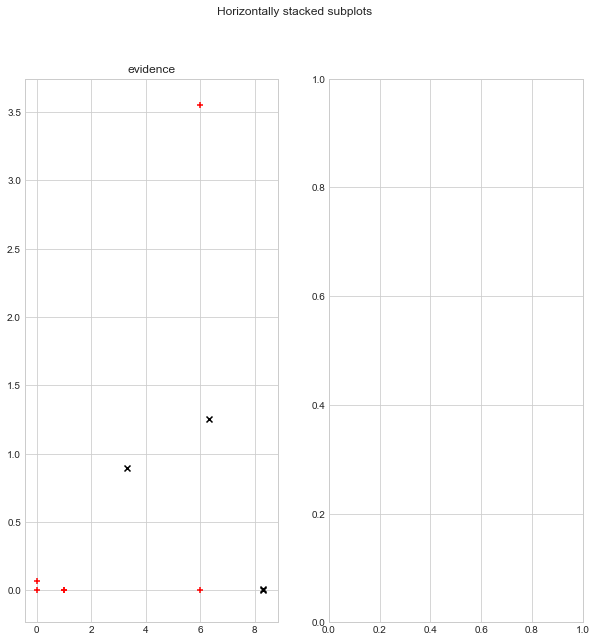

In [55]:
###keras KL activated model 47 epochs
Predictions = displayEvidence(model,test_ds)

In [16]:
ar = [1,2,3,4,5,6,7,8,9,10]
ar = [1,1,1,1,1,1,1,1,1,10]
ar = [0,0,0,0,0,0,0,0,1,10]
print(np.mean(ar))

Predictions.to_csv("predictions_softplus_trained.csv")


1.1


In [14]:
 print(Predictions.loc[(Predictions['Acc'] == True) & (Predictions['evidence']==0)])

      label  evidence  Acc  uncertainty
2         0       0.0  1.0          1.0
4         6       0.0  1.0          1.0
6         6       0.0  1.0          1.0
9         0       0.0  1.0          1.0
11        5       0.0  1.0          1.0
14        8       0.0  1.0          1.0
15        5       0.0  1.0          1.0
16        7       0.0  1.0          1.0
19        7       0.0  1.0          1.0
26        0       0.0  1.0          1.0
27        9       0.0  1.0          1.0
28        6       0.0  1.0          1.0
30        5       0.0  1.0          1.0
33        9       0.0  1.0          1.0
38        5       0.0  1.0          1.0
40        6       0.0  1.0          1.0
41        5       0.0  1.0          1.0
42        6       0.0  1.0          1.0
43        0       0.0  1.0          1.0
46        9       0.0  1.0          1.0
48        6       0.0  1.0          1.0
49        9       0.0  1.0          1.0
52        3       0.0  1.0          1.0
55        7       0.0  1.0          1.0


              label  evidence  uncertainty
Acc                                       
0.000000e+00    377       377          377
1.192093e-07    136       136          136
2.384186e-07     60        60           60
3.576278e-07     61        61           61
4.768370e-07     38        38           38
5.960463e-07     33        33           33
7.152555e-07     30        30           30
8.344647e-07     29        29           29
9.536739e-07     32        32           32
1.072883e-06     12        12           12
1.192092e-06     24        24           24
1.311301e-06     18        18           18
1.430510e-06     18        18           18
1.549720e-06     15        15           15
1.668929e-06     18        18           18
1.788138e-06     12        12           12
1.907347e-06     14        14           14
2.026556e-06     11        11           11
2.145765e-06     13        13           13
2.264974e-06     20        20           20
2.384183e-06     13        13           13
2.503392e-0

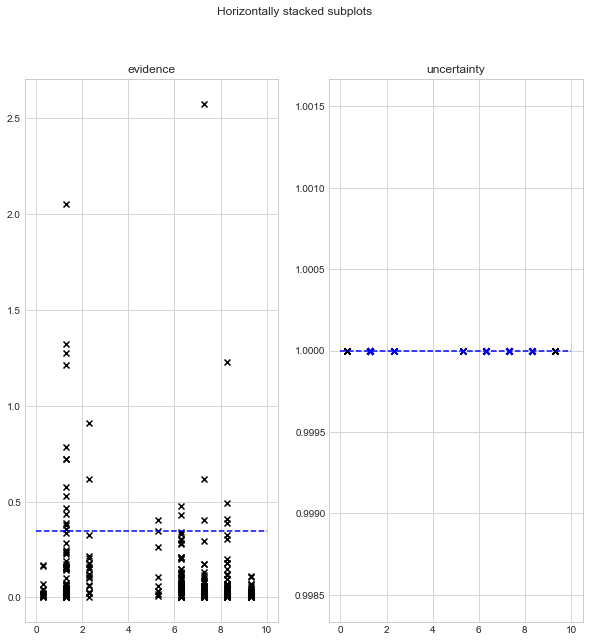

In [12]:
print(Predictions.groupby("Acc").count())
print(Predictions.groupby("Acc").mean())
print(Predictions.groupby("Acc").std())
E_threshold = Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["evidence"].mean() + Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["evidence"].std()
E_threshold = E_threshold.iloc[0]
print("evidence Threshold >= correct: ", E_threshold)
U_threshold = Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["uncertainty"].mean() - Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["uncertainty"].std()
U_threshold = U_threshold.iloc[0]
print("uncertainty Threshold <= correct: ", U_threshold)

print("Uncertainty")
print("Passed correct answers:", Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["uncertainty"] >=U_threshold)].sort_values("uncertainty").shape)
print("Accepted incorrect answers", Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["uncertainty"] < U_threshold)].sort_values("uncertainty").shape)

print("Evidence")
print("Passed correct answers:", Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["evidence"] <= E_threshold)].sort_values("evidence").shape)
print("Accepted incorrect answers", Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["evidence"] > E_threshold)].sort_values("evidence").shape)

fig, axs = plt.subplots(1, 2)
    
correct_rows = Predictions.loc[Predictions['Acc'] == True]
incorrect_rows = Predictions.loc[Predictions['Acc'] == False]


E_correct_rows_missed = Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["evidence"] <= E_threshold)].sort_values("evidence")
E_incorrect_rows_accepted = Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["evidence"] > E_threshold)].sort_values("evidence")


U_correct_rows_missed = Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["uncertainty"] >=U_threshold)].sort_values("uncertainty")
U_incorrect_rows_accepted = Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["uncertainty"] < U_threshold)].sort_values("uncertainty")

fig.suptitle('Horizontally stacked subplots')
axs[0].scatter(correct_rows['label'],correct_rows['evidence'],c ='r',marker='+')
axs[0].scatter(U_correct_rows_missed['label']-.2,U_correct_rows_missed['evidence'],c ='g',marker='+')
axs[0].scatter(incorrect_rows['label']+.3,incorrect_rows['evidence'],c ='k',marker='x')
axs[0].scatter(U_incorrect_rows_accepted['label']+.3,U_incorrect_rows_accepted['evidence'],c ='b',marker='x')
axs[0].plot(np.repeat(E_threshold,11),'b--')
axs[0].set_title("evidence")

axs[1].scatter(correct_rows['label'],correct_rows['uncertainty'],c ='r',marker='+')
axs[1].scatter(E_correct_rows_missed['label'],E_correct_rows_missed['uncertainty'],c ='g',marker='+')
axs[1].scatter(incorrect_rows['label']+.3,incorrect_rows['uncertainty'],c ='k',marker='x')
axs[1].scatter(E_incorrect_rows_accepted['label']+.3,E_incorrect_rows_accepted['uncertainty'],c ='b',marker='x')
axs[1].plot(np.repeat(U_threshold,11),'b--')

axs[1].set_title("uncertainty")

fig.set_size_inches(10, 10)
plt.show()